<a href="https://colab.research.google.com/github/Chanaka3534/FYP_LSTM/blob/main/FYP(LSTM_MODEL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,881 (120.63 KB)

 Trainable params: 30,881 (120.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0674 - val_loss: 0.0307
Epoch 2/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0233 - val_loss: 0.0527
Epoch 3/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0222 - val_loss: 0.0169
Epoch 4/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0182 - val_loss: 0.0239
Epoch 5/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0160 - val_loss: 0.0142
Epoch 6/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0153 - val_loss: 0.0157
Epoch 7/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0132 - val_loss: 0.0164
Epoch 8/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0131 - val_loss: 0.0138
Epoch 9/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0136 - val_loss: 0.0173
Epoch 10/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0128 - val_loss: 0.0101
Epoch 11/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0111 - val_loss: 0.0104
Epoch 12/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step

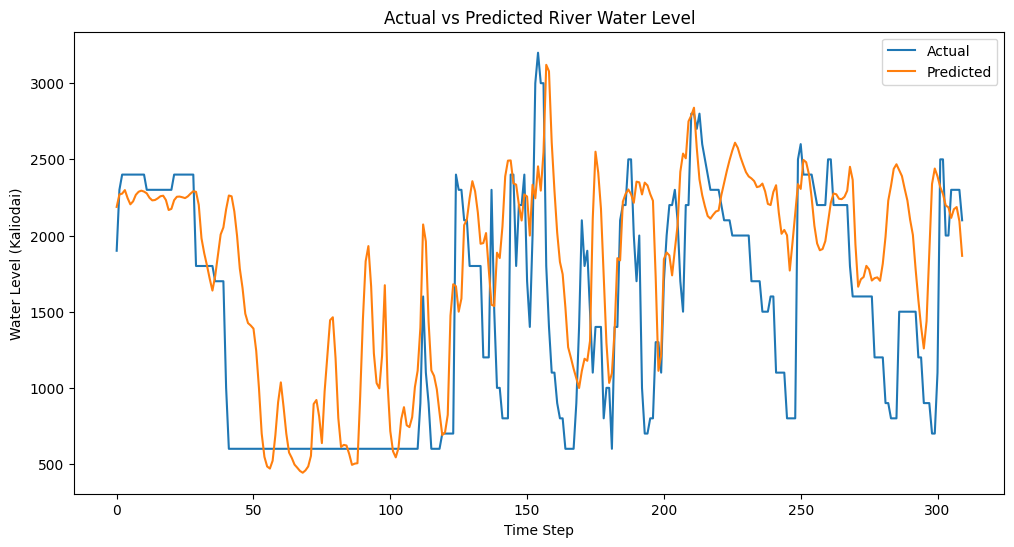

Mean Squared Error (MSE): 415962.23
Root Mean Squared Error (RMSE): 644.95
Mean Absolute Error (MAE): 475.19
R² Score: 0.2204
MAE % of mean: 32.14%
RMSE % of mean: 43.63%


In [29]:
# 📦 1) Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 🗂️ 2) Load dataset
df = pd.read_csv('FYP_DATA.csv')

# ➡️ 3) Convert columns
df['Resovior water level(m)'] = pd.to_numeric(df['Resovior water level(m)'], errors='coerce')
df['Resovior discharge rate'] = pd.to_numeric(df['Resovior discharge rate'], errors='coerce')
df['Water level(Kaliodai)'] = pd.to_numeric(df['Water level(Kaliodai)'], errors='coerce')

df = df.dropna()

# 🏷️ 4) Add previous river level as a new feature
df['Prev_Water_Level'] = df['Water level(Kaliodai)'].shift(1)
df = df.dropna()  # drop first row which has NaN due to shift

# 5️⃣ Select features & target
features = df[['Catchment Rainfall', 'Downstream rainfall', 'Resovior water level(m)', 'Resovior discharge rate', 'Prev_Water_Level']]
target = df['Water level(Kaliodai)'].values.reshape(-1, 1)

# 🔄 6) Normalize
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(features)
y_scaled = scaler_y.fit_transform(target)

# 🔑 7) Create sequences with time steps
def create_sequences(X, y, time_steps=30):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 30
X_seq, y_seq = create_sequences(X_scaled, y_scaled, TIME_STEPS)

# 📊 8) Train-test split
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

# 🧠 9) Improved LSTM: 2 stacked layers
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(TIME_STEPS, X_seq.shape[2])),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
model.summary()

# 🚀 10) Train longer
history = model.fit(X_train, y_train,
                    epochs=200,
                    batch_size=16,
                    validation_split=0.1,
                    verbose=1)

# ✅ 11) Predict & invert scale
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# 📈 12) Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted River Water Level')
plt.xlabel('Time Step')
plt.ylabel('Water Level (Kaliodai)')
plt.legend()
plt.show()

# 🏅 13) Evaluate: MSE, RMSE, MAE, R², % errors
mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

mean_y = np.mean(y_test_actual)
mae_percent = (mae / mean_y) * 100
rmse_percent = (rmse / mean_y) * 100

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"MAE % of mean: {mae_percent:.2f}%")
print(f"RMSE % of mean: {rmse_percent:.2f}%")


In [32]:
# Categorization function
def categorize_level(value):
    if value < 2500:
        return "NO"
    elif value < 2800:
        return "LOW"
    elif value < 2900:
        return "MEDIUM"
    else:
        return "HIGH"

# Apply categorization
predicted_classes = [categorize_level(y) for y in y_pred.flatten()]
actual_classes = df['Flood risk'].values[-len(predicted_classes):]


# Evaluation
print("Classification Report:")
print(classification_report(actual_classes, predicted_classes))

print("Confusion Matrix:")
print(confusion_matrix(actual_classes, predicted_classes))

Classification Report:
              precision    recall  f1-score   support

        HIGH       0.00      0.00      0.00         4
         LOW       0.00      0.00      0.00         2
      MEDIUM       0.00      0.00      0.00         2
          NO       0.98      0.96      0.97       302

    accuracy                           0.94       310
   macro avg       0.25      0.24      0.24       310
weighted avg       0.96      0.94      0.95       310

Confusion Matrix:
[[  0   1   0   3]
 [  1   0   0   1]
 [  1   0   0   1]
 [  0  11   1 290]]
